# 모델 평가와 성능 향상

1. 교차 검증: 안정적인 일반화 성능 측정 방법
2. score 메소드가 제공하는 정확도와 R2 값 이외의 성능 측정 방법

### 1. 교차검증(Cross-Validation)

![](cross.png)

일반화 성능을 평가하기 위해 훈련 세트와 테스트 세트로 나누어 한번 평가하는 것보다 안정적이고 뛰어난 통계적 평가 방법<br>
데이터를 여러 번 반복해서 나누고 여러 모델을 학습<br>

가장 일반적인 교차 검증 방법은 k-겹 교차검증(k-fole cross-validation)으로 k에 보통 5 또는 10을 사용<br>
데이터를 먼저 k개의 fold(부분집합)으로 나눔<br>
각각의 폴드를 테스트 세트로 하고 나머지를 훈련 세트로 하여 5번 평가를 반복<br>
이렇게 하면 k개의 정확도를 얻을 수 있음

#### Cross-Validation in scikit-learn

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html



In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

import numpy as np
np.set_printoptions(precision=3) #값이 소수점 이하 둘째자리까지만 나오도록 세팅

iris = load_iris()

print("Iris data shape: {}".format(iris.data.shape))
print("Iris labels: {}".format(set(iris.target)))

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

# 평가할 모형, 독립변수, 종속변수, k(fold의 수)의 순서로 매개변수를 설정
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("Cross-validation scores: {}".format(scores))

Iris data shape: (150, 4)
Iris labels: {0, 1, 2}
Cross-validation scores: [0.98  0.941 1.   ]


In [2]:
# k를 5개로 변경해서 평가를 수행
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.967 1.    0.933 0.967 1.   ]


In [3]:
# 얻어진 k개의 정확도에 대해 평균을 계산
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


### 교차검증의 장점

운에 의한 분류의 가능성을 낮춤: 만일 train set에는 분류하기 어려운 샘플만 들어갔다면, 혹은 그 반대의 경우<br>
교차검증에서는 모든 샘플이 테스트에 한번씩 들어가므로 공정하게 평가되었다고 할 수 있음<br>
또한 모형이 훈련 데이터에 얼마나 민감한지 알 수 있음. 즉 얻어진 k개의 정확도가 어떤 분포를 가지느냐에 따라 민감성을 추측<br>
단점은 평가 시간이 더 많이 걸린다는 것

### 계층별 k-겹 교차 검증(Stratified K-Fold cross-validation)

데이터셋을 순서대로 k개의 폴더로 하는 것은 문제 가능성이 있음<br>
예를 들어 극단적인 경우, 종속변수가 [0,0,0, 1, 1, 1, 2, 2, 2, ]의 형태로 되어 있다면 세 개의 폴더로 했을 때, 학습이 전혀 되지 않는 결과가 발생<br>
이를 해결하기 위해서는 먼저 random shuffling을 할 수 있고,<br>
둘째로 계층별 k-겹 교차검증을 할 수 있음<br>
계층별 k-겹 교차검증은 각 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔<br>
분류기에 대해서는 계층별 k-겹 교차검증을 사용하는 것이 보다 안정적임

![](cross_stratified.png)

### 교차검증 상세 옵션

scikit-learn의 KFold 분할기를 사용하면 보다 세밀한 제어가 가능

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).<br>
Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [4]:
#기본적인 사용방법
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [5]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.    1.    0.867 0.933 0.833]


In [6]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [7]:
# 랜덤 셔플링 등의 조절이 가능
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


#### LOOCV(Leave-one-out cross-validation)

폴드 하나에 샘플 하나만 있는 k-겹 교차 검증. 시간이 매우 오래 걸리는 단점이 있음

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

Provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set.

Note: LeaveOneOut() is equivalent to KFold(n_splits=n) and LeavePOut(p=1) where n is the number of samples.

Due to the high number of test sets (which is the same as the number of samples) this cross-validation method can be very costly. For large datasets one should favor KFold, ShuffleSplit or StratifiedKFold.

In [8]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))
#print(len(iris.data))

Number of cv iterations:  150
Mean accuracy: 0.97


#### 임의분할 교차검증(Shuffle-split cross-validation)

중복을 허용하는 샘플링, 매번 훈련-테스트 집합을 만들 때마다 전체 데이터셋에서 랜덤하게 샘플링을 수행.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html

Random permutation cross-validator

Yields indices to split data into training and test sets.

Note: contrary to other cross-validation strategies, random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets.

n_splits : int, default 10
Number of re-shuffling & splitting iterations.

test_size : float, int, None, default=None
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.1.

train_size : float, int, or None, default=None
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

샘플이 10개일 때, 훈련 세트는 5개, 테스트 세트는 2개로 하여 4번의 세트를 만듦
![](cross_shuffle.png)

In [9]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.96  0.96  0.973 0.987 0.987 0.973 0.96  0.96  0.88  0.947]


## 2. 그리드 서치(Grid Search)

매개변수 튜팅을 통한 일반화 성능의 개선방법<br>
그리드 서치: 매개변수들의 모든 가능한 조합에 대해 테스트를 시도하여 결과가 가장 좋은 매개변수 조합을 찾는 것

#### 간단한 그리드 서치(Simple Grid-Search)
for 문을 사용해 직접 구현

In [10]:
# naive grid search implementation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


#### The danger of overfitting the parameters and the validation set

위 예에서는 매개변수 조정을 위해 테스트 세트를 이미 사용했기 때문에 일반화 성능을 알기 어려움<br>
즉, 최적의 매개변수 조합은 테스트 세트에 대한 것이므로 다른 데이터에 대해서도 그 매개변수 조합이 동일하게 적용될 것으로 확신할 수는 없음<br>
따라서 일반화 성능을 위한 새로운 테스트 셋이 필요<br>
이를 해결하기 위해 보통 데이터 세트를 훈련 세트, 검증 세트, 테스트 세트로 나누어 검증 세트를 매개변수의 선택에 사용함

![](train_valid_test.png)

In [11]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)

# 테스트 스코어가 검증 세트가 없을 때와는 확연히 다른 것을 볼 수 있음
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


#### 교차검증을 사용한 그리드 서치
보다 안정된 검증을 위해 교차검증을 사용

In [12]:
# reference: manual_grid_search_cv
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 교차검증과 그리드 서치를 사용한 매개변수 선택과 모델 평가의 작업 흐름

![](grid.png)

#### scikit-learn이 제공하는 GridSearchCV

지금까지 for 문을 이용해 작업한 것을 보다 쉽게 할 수 있도록 지원

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [13]:
# 먼저 parameter를 설정
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# 매개변수로 사용할 분류모형, parameter 집합과 cross-validation의 k 등을 지정
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

In [15]:
# GridSearchCV에서 알아서 검증 집합을 설정하여 사용하므로 일부러 나눠 줄 필요 없음
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [16]:
grid_search.fit(X_train, y_train)

C:\Users\gram\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [17]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [18]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [19]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### 결과 분석
grid_search.cv_results_에 저장된 내용을 Pandas data frame으로 변환하여 내용을 확인

In [20]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001199,0.000401,0.000799,0.001166,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.001400,0.001355,0.000800,0.000400,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.001602,0.000492,0.000797,0.000399,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000599,0.000489,0.000600,0.000490,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000799,0.000400,0.000200,0.000400,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


#### 히트맵(Heatmap)

교차검증 결과의 시각화

https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/image_annotated_heatmap.html

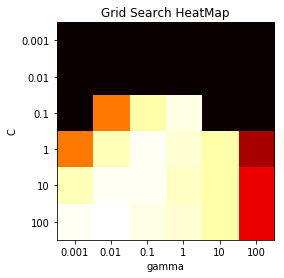

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# 먼저 테스트 결과를 6x6의 이차원 행렬로 변환
# 이 행렬은 x축에 gamma, y축에 C 값을 두고, 조합에 따른 score를 보여 줌

scores = np.array(results.mean_test_score).reshape(6, 6)

plt.xlabel('gamma')
plt.xticks(range(len(param_grid['gamma'])), param_grid['gamma'])
plt.ylabel('C')
plt.yticks(range(len(param_grid['C'])), param_grid['C'])
plt.imshow(scores, cmap='hot', interpolation='nearest')

plt.title("Grid Search HeatMap")
#fig.tight_layout()

plt.show()

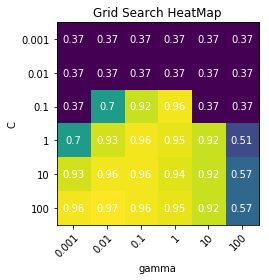

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

scores = np.array(results.mean_test_score).reshape(6, 6)
scores = np.around(scores, decimals=2)

fig, ax = plt.subplots()
im = ax.imshow(scores)

ax.set_xlabel('gamma')
ax.set_ylabel('C')

# We want to show all ticks...
ax.set_xticks(np.arange(len(param_grid['gamma'])))
ax.set_yticks(np.arange(len(param_grid['C'])))
# ... and label them with the respective list entries
ax.set_xticklabels(param_grid['gamma'])
ax.set_yticklabels(param_grid['C'])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(param_grid['C'])):
    for j in range(len(param_grid['gamma'])):
        text = plt.text(j, i, scores[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Grid Search HeatMap")
fig.tight_layout()
plt.show()

## 3. 평가지표와 측정
지금까지는 정확도(accuracy)와 R2를 사용했으나, 주어진 상황에 따라 성능을 제대로 측정하지 못할 가능성이 있음<br>
따라서 올바른 지표의 선택이 중요

#### 이진 분류의 평가지표
*에러의 종류*
1. false positive: 암 진단에서 암에 걸리지 않은 사람을 양성으로 판단 (type I error)
2. false negative: 암에 걸린 사람을 음성으로 분류 (type II error)

*불균형 데이터셋*
<br>두 클래스 중에서 어느 한 쪽의 데이터가 훨씬 많은 경우

*신용카드 사기의 예: 신용카드 결제에서 1000개 중 1개 정도로 사기가 있다고 할 때, 무조건 사기가 아니라고 판단하면 정확도는 99.9%가 나옴*

어떻게 성능을 판단해야 할까?

In [26]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.DESCR) #boston['DESCR'] 도 가능

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

(1797, 64) (1797,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


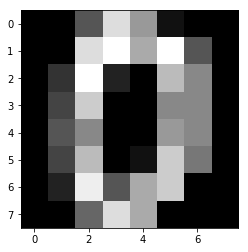

In [27]:
print(digits.data.shape, digits.target.shape)
print(digits.data[0])
# 독립변수의 모양을 확인
img = np.array(digits.data[0]).reshape(8, 8)
plt.imshow(img, cmap='gray')
print(digits.target[0])

In [28]:
# 값이 9이면 True, 아니면 False로 종속변수를 바꿈, 
# 0~9까지 비슷한 수의 샘플이 있다면 이제 9인 것과 아닌 것의 수가 1:9 정도가 됨

y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [29]:
#DummyClassifier: test data의 내용과 관계 없이 기본 규칙에 따라 예측
# most_frequent로 설정하면 항상 train set에서 다수였던 class로 예측
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [31]:
from sklearn.linear_model import LogisticRegression

# DummyClassifier에 strategy를 주지 않으면 train set에서의 비율에 따라 확률적으로 예측
# 즉 test data의 내용과 관계 없이 확률에 따라 예측함
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(solver='lbfgs', max_iter=1000, C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.82
logreg score: 0.98


##### Confusion matrices

![](matrix.png)

In [32]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


In [33]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[357  46]
 [ 42   5]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


###### Relation to accuracy
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

##### Precision, recall and f-score
\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

\begin{equation}
\text{F} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("               precision, recall, f1 score, ")
print("most frequent: {:.2f}       {:.2f}    {:.2f}".format(
    precision_score(y_test, pred_most_frequent),
    recall_score(y_test, pred_most_frequent),
    f1_score(y_test, pred_most_frequent)))
print("dummy:         {:.2f}       {:.2f}    {:.2f}".format(
    precision_score(y_test, pred_dummy),
    recall_score(y_test, pred_dummy),
    f1_score(y_test, pred_dummy)))
print("tree:          {:.2f}       {:.2f}    {:.2f}".format(
    precision_score(y_test, pred_tree),
    recall_score(y_test, pred_tree),
    f1_score(y_test, pred_tree)))
print("logistic reg.: {:.2f}       {:.2f}    {:.2f}".format(
    precision_score(y_test, pred_logreg),
    recall_score(y_test, pred_logreg),
    f1_score(y_test, pred_logreg)))

               precision, recall, f1 score, 
most frequent: 0.00       0.00    0.00
dummy:         0.10       0.11    0.10
tree:          0.64       0.49    0.55
logistic reg.: 0.98       0.87    0.92


C:\Users\gram\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gram\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
